In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('/home/yash/Desktop/Python/Data_Sets/MNIST/train.csv')
data = df.values
print (df.shape)
print (data.shape)


(42000, 785)
(42000, 785)


In [6]:
x = data[:,1:]
y = data[:,0]

print (x.shape)
print (y.shape)

(42000, 784)
(42000,)


3


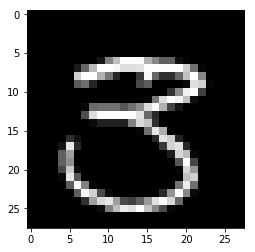

In [7]:
def drawimg(i):
    img = x[i].reshape((28,28))
    print (y[i])
    plt.imshow(img, cmap='gray')
    
drawimg(7)

In [8]:
split = int(0.8 * x.shape[0])
print (split)

33600


In [9]:
x_train = x[:split,:]
y_train = y[:split]
x_test = x[split:,:]
y_test = y[split:]

In [10]:
print (x.shape,x_train.shape,x_test.shape)
print (y.shape,y_train.shape,y_test.shape)

(42000, 784) (33600, 784) (8400, 784)
(42000,) (33600,) (8400,)


In [11]:
def dist(x1,x2):
    return np.sqrt(((x2-x1)**2).sum())

def knn(x_train,y_train,query_x,k=5):
    # First Step
    dist_vals = []
    
    m = x_train.shape[0]
    for ix in range(m):
        d = dist(query_x,x_train[ix])
        dist_vals.append((d,y_train[ix]))

    dist_vals = sorted(dist_vals)
    dist_vals = dist_vals[:k]
    
    
    y = np.array(dist_vals)
    #print (y)
    t = np.unique(y[:,1],return_counts=True)
    index  = t[1].argmax()
    prediction = t[0][index]
    return prediction
    
def drawquery(x):
    img = x.reshape((28,28))
    plt.imshow(img, cmap='gray')

9
9


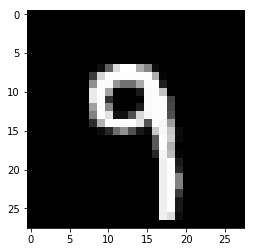

In [12]:
query_x = x_test[111]
pred = int(knn(x_train,y_train,query_x))

print (pred)
print (y_test[111])
drawquery(query_x)

In [13]:
match = 0
fail = 0
failmat = []
for i in range(5):
    pred = int(knn(x_train,y_train,x_test[i]))
    if(pred==y_test[i]):
        match += 1
    else:
        fail += 1
        failmat.append(i)
print (match , fail)

19 1


In [14]:
print (failmat)

[27]


7.0


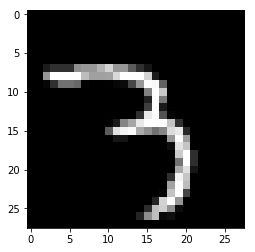

In [15]:
print (knn(x_train,y_train,x_test[27]))
drawquery(x_test[27])